In [1]:
import pandas as pd

In [2]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
data_confirmed = pd.read_csv(url_confirmed)
data_deths = pd.read_csv(url_deths)
data_recovered = pd.read_csv(url_recovered)

days=data_confirmed.shape[1]-4

print("matrix shape:" ,data_confirmed.shape)
data_confirmed.head(5)

matrix shape: (273, 386)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062


total confirmed:  239767.594 k
total deths:  13654.103 k
total recovered:  153125.75 k


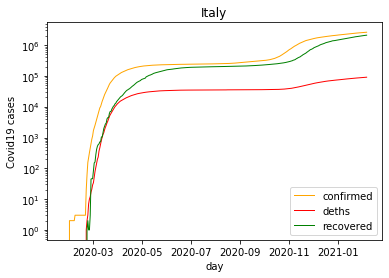

In [23]:
country='Italy'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

confirmedC = data_confirmed.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]
dethsC = data_deths.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]
recoveredC = data_recovered.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).loc[country]

df=pd.DataFrame({'x':pd.date_range("01/22/20",periods=days),'yy1':confirmedC.values,'yy2':dethsC.values,'yy3':recoveredC.values})
# multiple line plot
plt.plot( 'x', 'yy1', data=df, marker='', color='orange', linewidth=1,label="confirmed")
plt.plot( 'x', 'yy2', data=df, marker='', color='red', linewidth=1,label="deths")
plt.plot( 'x', 'yy3', data=df, marker='', color='green', linewidth=1,label="recovered")
plt.legend()
plt.yscale("log")
plt.xlabel('day')
plt.ylabel('Covid19 cases')
plt.title(country)

print("total confirmed: ", confirmedC.sum()/1000,'k')
print("total deths: ", dethsC.sum()/1000,'k')
print("total recovered: ", recoveredC.sum()/1000,'k')

In [47]:
import geopandas as gpd
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN','geometry']]
#Rename columns.
gdf.columns = ['Country/Region','geometry']
gdf.head(5)

#print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
#gdf = gdf.drop(gdf.index[159])

,Country/Region,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [49]:
confirmedT=data_confirmed.groupby("Country/Region").sum().drop(['Lat','Long'], axis=1).sum(axis=1)
confirmedT

Country/Region
Afghanistan           10484841
Albania                6304861
Algeria               14444817
Andorra                1022622
Angola                 2043453
                        ...   
Vietnam                 278994
West Bank and Gaza    14386498
Yemen                   460484
Zambia                 3895911
Zimbabwe               2328014
Length: 192, dtype: int64

In [52]:
#Merge dataframes gdf and confirmedT.
gdf.merge(confirmedT,left_on = 'Country/Region')

ValueError: Cannot merge a Series without a name